<div>Machine Learning 2019-2020 DIC-1<br/><h3>Mme Diop</h3></div>
<h1 ALIGN="center">&#10066;RAPPORT DE TP N<sup><u>o</u></sup>1: EXERCICE 2</h1>



<div align="center" style="background-color: blue; color: white">
<h4>Abdou Yaya Sadiakhou</h4> 
<b>élève-ingénieur à l'Ecole Polytechnique de Thiès(<a href="www.ept.sn" style="background-color: red">EPT</a>)</b></div>

<img src='img/ml_algos.jpg'/>

<pre><u>Exercice 2:</u> Descente de gradient

La recherche d’optimum avec des solutions directes comme l’équation normale est souvent une tâche très fastidieuse. Une solution le plus souvent plus efficace est la Descente de Gradient (DG). La descente de gradient est un algorithme d’optimisation qui permet de trouver des solutions optimales en corrigeant petit à petit les paramètres dans le but de minimiser une fonction coût.</pre>

<img src='img/gradient.png'/>

<pre>
1. Discuter sur l’impact de la dimension des pas (taux d’apprentissage) et de la normalisation des données pour la DG.
</pre>

<div style="font-family: callipso;">Dans la plupart des problèmes d'apprentissage machine supervisé, nous devons définir un modèle et estimer ses paramètres sur la base d'un ensemble de données de formation. Une technique populaire et facile à utiliser pour calculer ces paramètres consiste à minimiser l'erreur du modèle avec la méthode de descente en gradient. Le Gradient Descent estime les poids du modèle en plusieurs itérations en minimisant une fonction de coût à chaque étape.
</div>
<div style="font-family: callipso;">
<h3 align="center" style="color: blue;"><u>Learning rate (taux d'apprentissage)</u></h3><br/>
    <img src="img/l_rate.png"/>
Pour que la méthode Gradient Descent fonctionne, nous devons fixer le &eta; (taux d'apprentissage) à une valeur appropriée. Ce paramètre détermine à quelle vitesse ou à quelle lenteur nous nous rapprocherons des poids optimaux. Si le &eta; est très grand, nous passerons la solution optimale. S'il est trop petit, nous aurons besoin de trop d'itérations pour converger vers les meilleures valeurs. Il est donc crucial d'utiliser un bon &eta;.
<p>
Une bonne technique consiste à adapter la valeur de &eta; à chaque itération. L'idée est que plus on s'éloigne des valeurs optimales, plus on doit se rapprocher rapidement de la solution et donc plus la valeur de &eta; doit être élevée. Plus vous vous rapprochez de la solution, plus sa valeur devrait être faible.
</p>
</div>
<br>
<h3 align="center" style="color: blue;"><u>Normalisation</u></h3><br/>
<img src="img/Normalization-Formula.jpg">
<div style="font-family: callipso;">
Dans de nombreux problèmes d'apprentissage machine, la normalisation des vecteurs d'entrée est une pratique assez courante. Dans certaines techniques, la normalisation est nécessaire parce qu'elles utilisent en interne des distances ou des variances de caractéristiques et donc, sans normalisation, les résultats seraient fortement affectés par la caractéristique ayant la plus grande variance ou échelle. La normalisation de vos entrées peut également aider votre méthode d'optimisation numérique (telle que la descente en gradient) à converger beaucoup plus rapidement et précisément. 
</div>

<pre>2. Générer des données aléatoires X.</pre>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import functools
import time
import warnings
# Pour ignorer certains erreurs
warnings.filterwarnings('ignore')

In [2]:
# Generation de données aleatoires
def aleatoire_X(rows, cols):
    X = 3.5 * np.random.rand(rows, cols)
    return X
def aleatoire_y(X):
    return 4 + 3*X + np.random.normal(-1, 1, X.shape[0])

In [3]:
X = aleatoire_X(100, 1)

<pre>3. Normaliser les données en vous inspirant du script suivant</pre>

---
***
___
```Python
# Numpy
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
# StandardScaler de ScikitLearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
```
---
***
___

In [16]:
# methode 1
X_norm1 = (X - X.mean(axis=0)) / X.std(axis=0)

In [17]:
# methode 2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm2 = scaler.fit_transform(X)
y = aleatoire_y(X_norm2)
y.shape

(100, 100)

<pre>4. Nous considérons la descente de gradient ordinaire avec la fonction coût d’un modèle de régression linéaire. Nous supposons que le vecteur gradient de la fonction coût est donnée par le vecteur qui suit:</pre>
---
***
___
$$\nabla_{\theta}MSE(\theta) =\left(
\begin{array}{l}
\frac{\partial}{\partial \theta_0}MSE(\theta)\\
\frac{\partial}{\partial \theta_1}MSE(\theta)\\
 .\\
 .\\
\frac{\partial}{\partial \theta_n}MSE(\theta)\\
\end{array}
\right) = \frac{2}{m}X^T.(X.\theta - y)$$
<pre>
où
</pre>
$$ \frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m(\theta^T.x^i-y^i)x_j^i $$
---
***
___
<pre>
Une fois que l’on a le vecteur de gradient, il suffit d’aller dans la direction opposée pour descendre. Ainsi le pas de descente de gradient est donnée par:</pre>
$$\theta_{etapeSuivante} = \theta - \eta\nabla_{\theta}MSE(\theta)$$
<pre>
où <b>&eta;</b> est le taux d'apprentissage
</pre>

<pre>(a) Implémenter l’algorithme de descente de gradient ordinaire avec un nombre d’itération de l’algorithme fixé à 1000.</pre>

<img src="img/gradient_desc.gif"/>

In [19]:
def time_decorator(func):
    @functools.wraps(func)
    def wrapper_time(*args, **kwargs):
        debut = time.perf_counter()
        val = func(*args, **kwargs)
        fin = time.perf_counter()
        exec_time = fin - debut
        print("|{:>20}:{:>10.5f} secondes".format("temps d'execution", exec_time))
        return val
    return wrapper_time

def hypothese_h(X, theta):
    return np.dot(X, theta)

def get_gradient(X, y, theta):
    h = hypothese_h(X, theta)
    n = len(y)
    gradient = 2 / n * np.dot(X.T, (h - y))
    return gradient

def fonction_cout(X, y, theta):
    m = len(y)
    h = hypothese_h(X, theta)
    J_theta = (1/2*m) * np.sum(np.square(h-y))
    return J_theta

@time_decorator
def ordinaire_DGO(X, y, theta, eta=0.02, n_iter=1000):
    errors = np.zeros(n_iter)
    for iter in range(n_iter):
        theta = theta - eta * get_gradient(X, y, theta)
        errors[iter] = fonction_cout(X, y, theta)
    return theta, errors
    
# @time_decorator
# def modified_ordinaire_DGO(X, y, theta, eta=0.02, n_iter=1000, epsilon=0.001):
#     errors = []
#     for iter in range(n_iter):
#         theta = theta - eta * get_gradient(X, y, theta)
#         errors.append(fonction_cout(X, y, theta))
#     return theta, errors

|   temps d'execution:   0.38086 secondes
|             theta_0:     4.694
|             theta_1:     3.000
|         erreurs MSE:      0.17


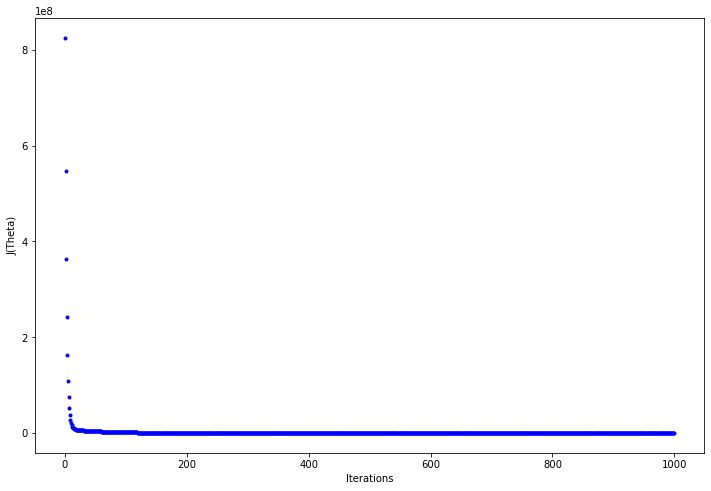

In [20]:
n_iter = 1000
X = aleatoire_X(300, 1)
scaler = StandardScaler()
#X_norm2 = scaler.fit_transform(X)
y = aleatoire_y(X)

theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
theta, errors = ordinaire_DGO(X_b, y, theta, 0.02, 1000)
print('|{:>20}:{:>10.3f}\n|{:>20}:{:>10.3f}'.format('theta_0', theta[0][0], 'theta_1', theta[1][0]))
print('|{:>20}:{:>10.2f}'.format('erreurs MSE', errors[-1]))
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),errors,'b.')

In [19]:
# voyons de plus prés

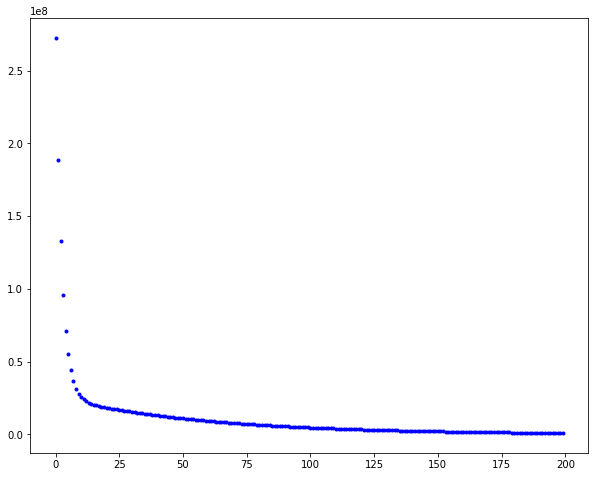

In [20]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),errors[:200],'b.')



<pre>(b) En vous basant sur les graphes et les temps de calcul, interpréterles résultats obtenus avec les taux d’apprentissage suivantes : η =0.02, η = 0.1 et η = 0.5.</pre>

-----------------------------------------
|                 eta:     0.001
|   temps d'execution:   0.37853 secondes
|              errors:  8078.088
-----------------------------------------
-----------------------------------------
|                 eta:      0.02
|   temps d'execution:   0.39443 secondes
|              errors:     0.035
-----------------------------------------
-----------------------------------------
|                 eta:       0.1
|   temps d'execution:   0.40532 secondes
|              errors:     0.000
-----------------------------------------
-----------------------------------------
|                 eta:       0.5
|   temps d'execution:   0.37373 secondes
|              errors:       nan
-----------------------------------------


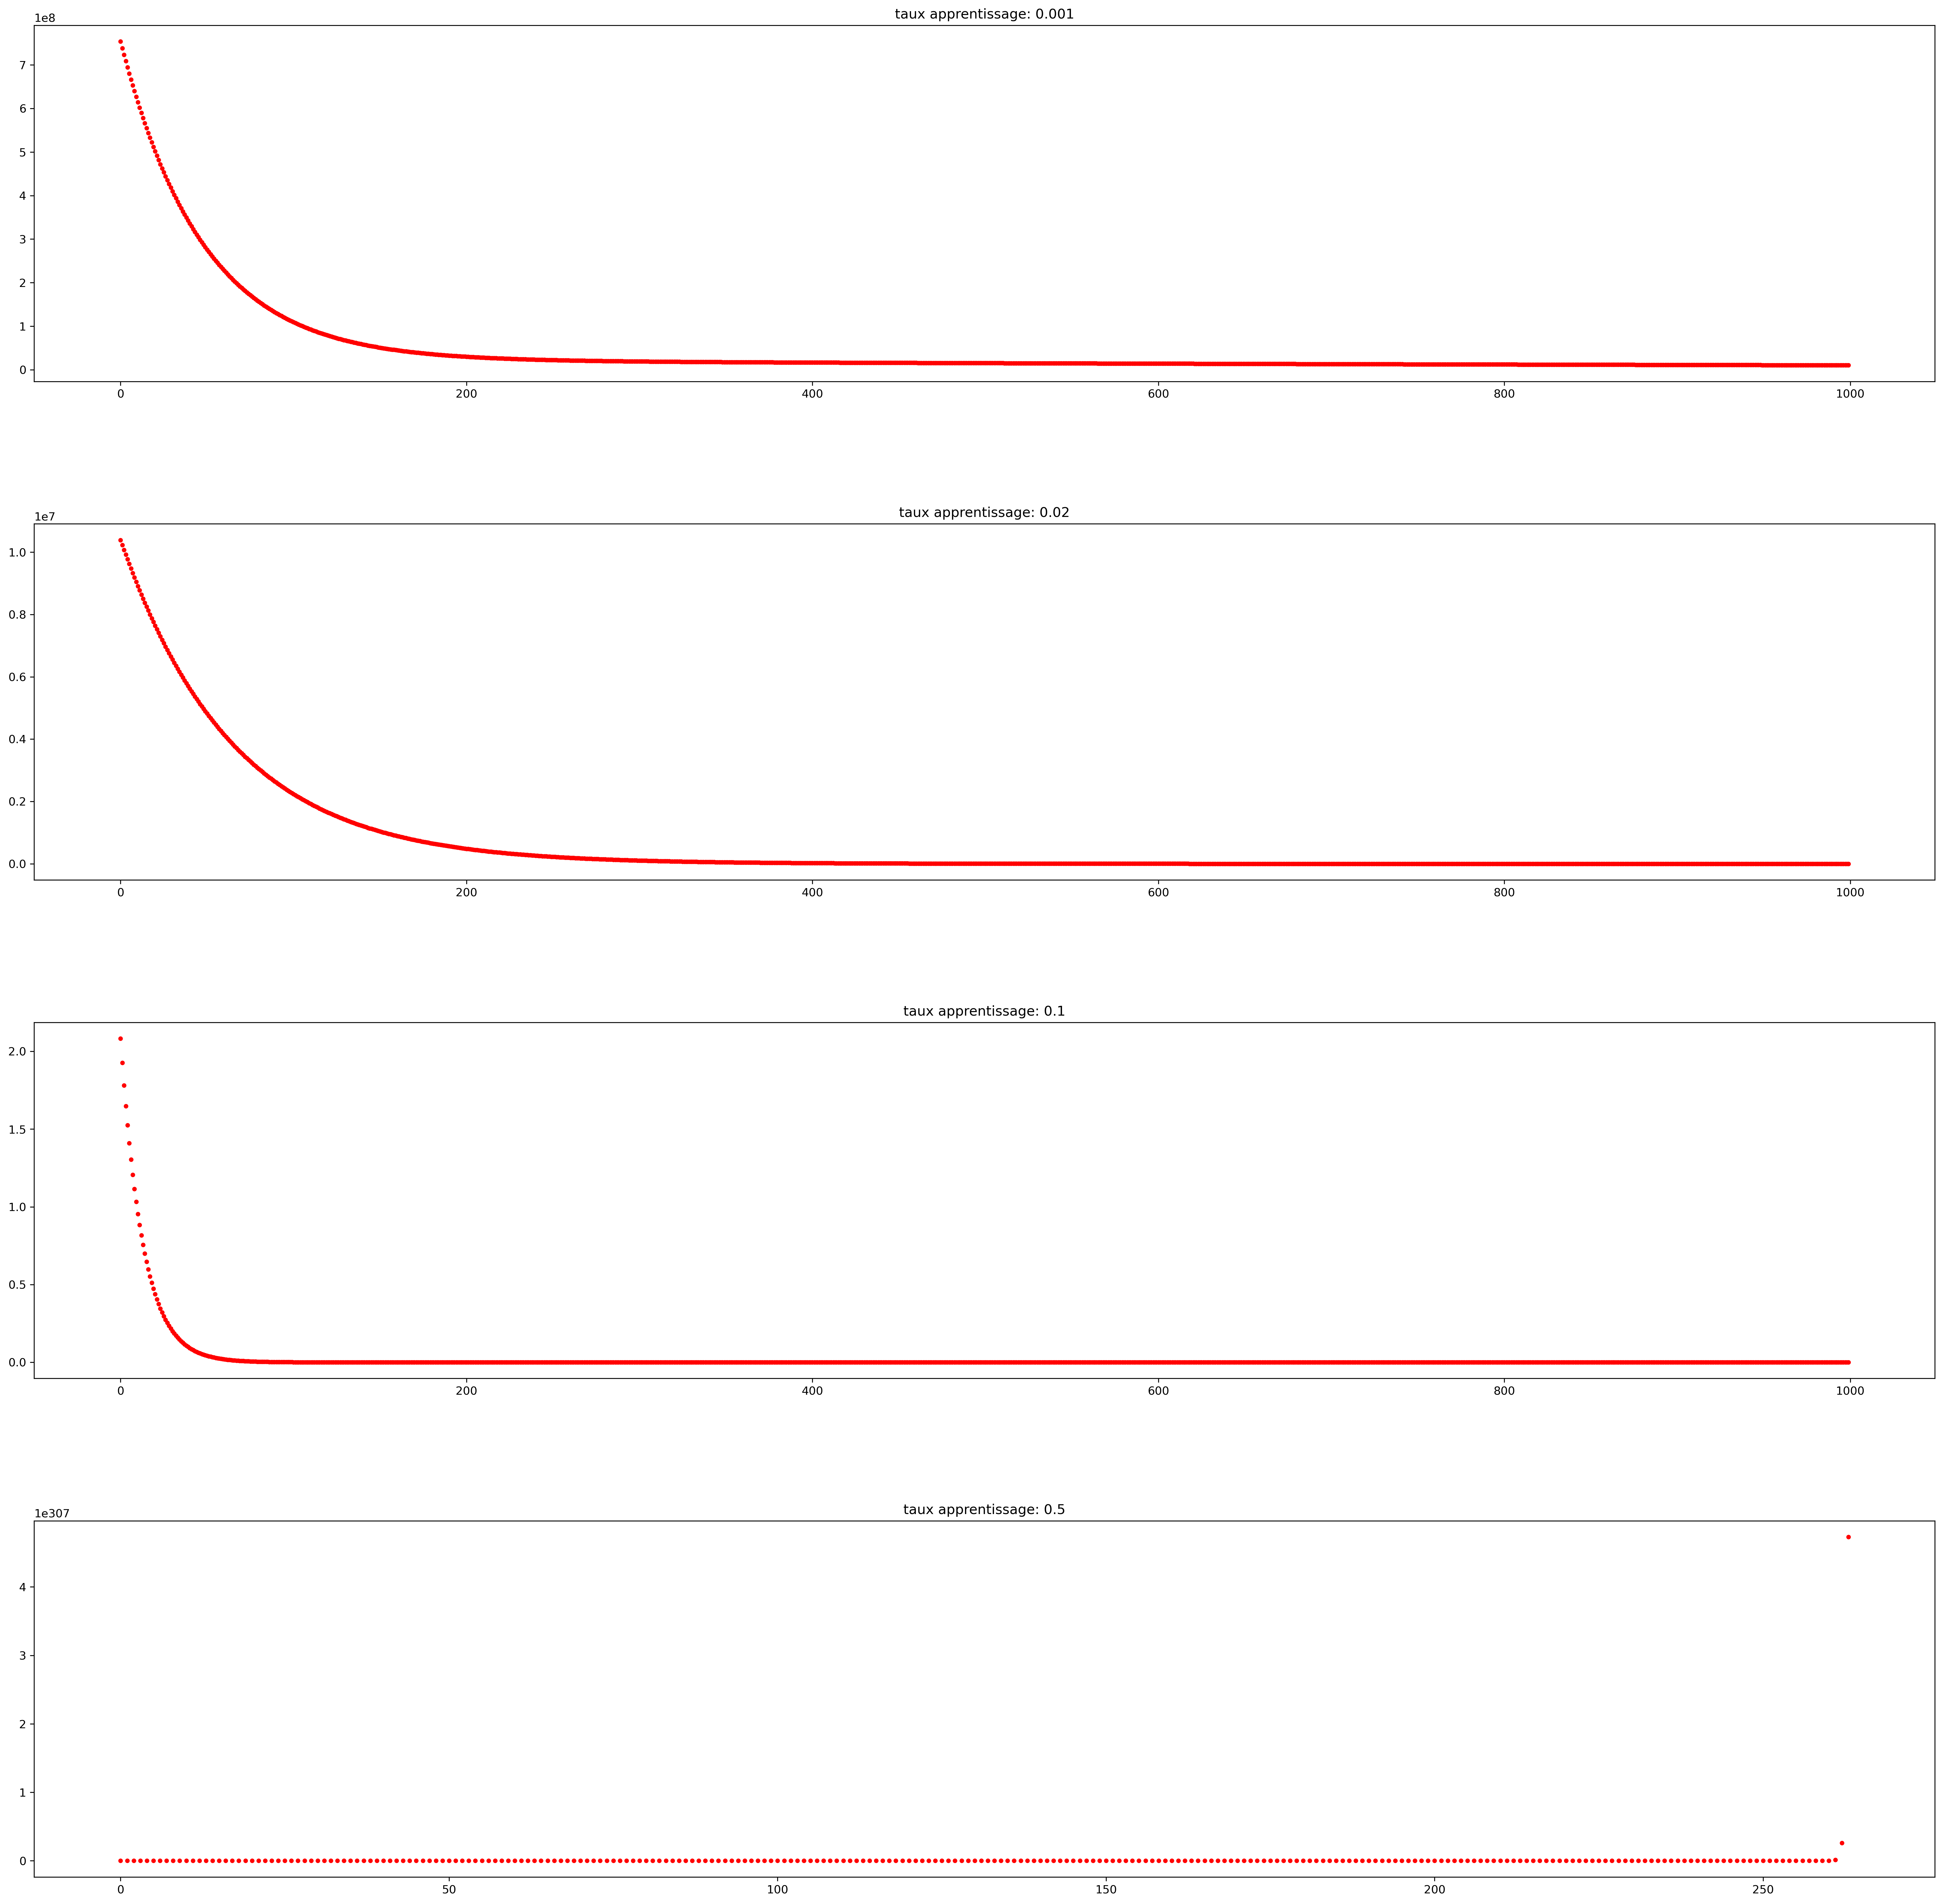

In [25]:
etas = [0.001, 0.02, 0.1, 0.5]
i = 0
fig = plt.figure(figsize=(30,30),dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
X = aleatoire_X(300, 1)
#scaler = StandardScaler()
#X_norm2 = scaler.fit_transform(X)
y = aleatoire_y(X)

theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
for eta in etas:
    i += 1
    print('-'*41)
    print('|{:>20}:{:>10}'.format('eta', eta))
    theta,errors = ordinaire_DGO(X_b, y, theta, eta=eta)
    print('|{:>20}:{:>10.3f}'.format('errors', errors[-2]-errors[-1]))
    print('-'*41)
    ax = fig.add_subplot(len(etas), 1, i)
    ax.set_title('taux apprentissage: {}'.format(eta))
    ax.plot(range(n_iter), errors, 'r.')

<h3><u>interpretation</u></h3>

Convergence rapide si &eta; elevé lente dans le cas contraire

<pre>(c) En testant plusieurs nombre d’itération différentes, interpréter l’impact du nombre d’itération sur le résultat obtenu.</pre>

In [ ]:
# prenons eta=0.001
n_iters = [100, 300, 1000, 2000, 10000]
i = 0
fig = plt.figure(figsize=(30,30),dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
X = aleatoire_X(300, 1)
#scaler = StandardScaler()
#X_norm2 = scaler.fit_transform(X)
y = aleatoire_y(X)

theta = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
for iter in n_iters:
    i += 1
    print('-'*41)
    print('|{:>20}:{:>10}'.format('n_iterations', iter))
    theta, errors = ordinaire_DGO(X_b, y, theta, eta=0.001, n_iter=iter)
    print('|{:>20}:{:>10.3f}'.format('errors', errors[-2]-errors[-1]))
    print('-'*41)
    ax = fig.add_subplot(len(n_iters), 1, i)
    ax.set_title('nbre_iterations: {}'.format(iter))
    ax.plot(range(iter), errors, 'r.')

<h3><u>interpretation</u></h3>
<pre>
la convergence est plus rapide si le nombre d'iterations est elevé
</pre>

<pre>(d) Modifier l’algorithme de manière à choisir un très grand nombre d’itérations, et interrompre l’algorithme lorsque le vecteur de gradient devient très petit ie quand sa norme devient inférieure à une tolérance &epsilon; ce qui signifie que la descente de gradient atteint presque son minimum.</pre>

In [ ]:
@time_decorator
def ordinaire_DGO_modifie(X, y, theta, eta=0.02, n_iter=1000, epsilon=0.001):
    convergence = False
    iter = 1
    errors = np.zeros(n_iter)
    errors[0] = fonction_cout(X, y, theta)
    while not convergence:
        grd = get_gradient(X, y, theta)
        theta = theta - eta * grd
        errors[iter] = fonction_cout(X, y, theta)
        iter += 1
        
        if (errors[iter-2] - errors[iter-1]) < epsilon:
            print('Convergence!! aprés:{:>10} iterations'.format(iter))
            break
        if iter == n_iter:
            print('Convergence!! aprés:{:>10} iterations'.format(iter))
            convergence = True 
    return theta, errors

In [ ]:
# n_iter = 1000
# X = aleatoire_X(800, 1)
# #scaler = StandardScaler()
# #X_norm2 = scaler.fit_transform(X)
# y = aleatoire_y(X)

# theta = np.random.randn(2,1)
# X_b = np.c_[np.ones((len(X), 1)), X]

# for e in epsilon:
#     theta, errors = ordinaire_DGO_modifie(X_b, y, theta, n_iter=n_iter, eta=0.01, epsilon=e)
#     print('-'*41)
#     print('|{:>20}:{:>10}'.format('l_rate', e))
#     print('|{:>20}:{:>10.3f}\n|{:>20}:{:>10.3f}'.format('theta_0', theta[0][0], 'theta_1', theta[1][0]))
#     #print('|{:>20}:{:>10.2f}'.format('erreurs MSE', errors[-1]))
#     print('-'*41)
#     fig,ax = plt.subplots(figsize=(12,8))
    
#     ax.set_ylabel('J(Theta)')
#     ax.set_xlabel('Iterations')
#     _=ax.plot(range(n_iter),errors,'b.')
    
n_iter = 5000
epsilon = [0.0001, 0.001, 0.01, 0.5, 0.75, 1.0]
fig = plt.figure(figsize=(30,30),dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
X = aleatoire_X(800, 1)
#scaler = StandardScaler()
#X_norm2 = scaler.fit_transform(X)
y = aleatoire_y(X)
i = 0

X_b = np.c_[np.ones((len(X), 1)), X]
for e in epsilon:
    theta = np.random.randn(2,1)*10
    i += 1
    print('-'*41)
    theta, errors = ordinaire_DGO_modifie(X_b, y, theta, n_iter=n_iter, eta=0.01, epsilon=e)
    print('|{:>20}:{:>10}'.format('seuil', e))
    print('|{:>20}:{:>10}'.format('taux', 0.01))
    print('|{:>20}:{:>10.3f}\n|{:>20}:{:>10.3f}'.format('theta_0', theta[0][0], 'theta_1', theta[1][0]))
    #print('|{:>20}:{:>10.2f}'.format('erreurs MSE', errors[-1]))
    ax = fig.add_subplot(len(epsilon), 1, i)
    ax.set_title('learning rate: {}'.format(e))
    ax.plot(range(n_iter), errors, 'r.')

-----------------------------------------
|        n_iterations:       100
|   temps d'execution:   0.03968 secondes
|              errors:4668848.573
-----------------------------------------
-----------------------------------------
|        n_iterations:       300
|   temps d'execution:   0.12674 secondes
|              errors: 14695.111
-----------------------------------------
-----------------------------------------
|        n_iterations:      1000
|   temps d'execution:   0.37330 secondes
|              errors:  1038.783
-----------------------------------------
-----------------------------------------
|        n_iterations:      2000
|   temps d'execution:   0.74875 secondes
|              errors:   187.761
-----------------------------------------
-----------------------------------------
|        n_iterations:     10000
|   temps d'execution:   4.20744 secondes
|              errors:     0.036
-----------------------------------------


<h3><u>interpretation</u></h3>
<pre>
la convergence est plus rapide si le nombre d'iterations est elevé
</pre>

<pre>(d) Modifier l’algorithme de manière à choisir un très grand nombre d’itérations, et interrompre l’algorithme lorsque le vecteur de gradient devient très petit ie quand sa norme devient inférieure à une tolérance &epsilon; ce qui signifie que la descente de gradient atteint presque son minimum.</pre>

In [27]:
@time_decorator
def ordinaire_DGO_modifie(X, y, theta, eta=0.02, n_iter=1000, epsilon=0.001):
    convergence = False
    iter = 1
    errors = np.zeros(n_iter)
    errors[0] = fonction_cout(X, y, theta)
    while not convergence:
        grd = get_gradient(X, y, theta)
        theta = theta - eta * grd
        errors[iter] = fonction_cout(X, y, theta)
        iter += 1
        
        if (errors[iter-2] - errors[iter-1]) < epsilon:
            print('Convergence!! aprés:{:>10} iterations'.format(iter))
            break
        if iter == n_iter:
            print('Convergence!! aprés:{:>10} iterations'.format(iter))
            convergence = True 
    return theta, errors

-----------------------------------------
Convergence!! aprés:      3278 iterations
|   temps d'execution:  37.30574 secondes
|               seuil:    0.0001
|                taux:      0.01
|             theta_0:     3.159
|             theta_1:     3.000
-----------------------------------------
Convergence!! aprés:      2907 iterations
|   temps d'execution:  32.33541 secondes
|               seuil:     0.001
|                taux:      0.01
|             theta_0:     3.159
|             theta_1:     3.000
-----------------------------------------
Convergence!! aprés:      2446 iterations
|   temps d'execution:  26.71556 secondes
|               seuil:      0.01
|                taux:      0.01
|             theta_0:     3.159
|             theta_1:     3.000
-----------------------------------------
Convergence!! aprés:      2360 iterations
|   temps d'execution:  28.35749 secondes
|               seuil:       0.5
|                taux:      0.01
|             theta_0:     3.158
|

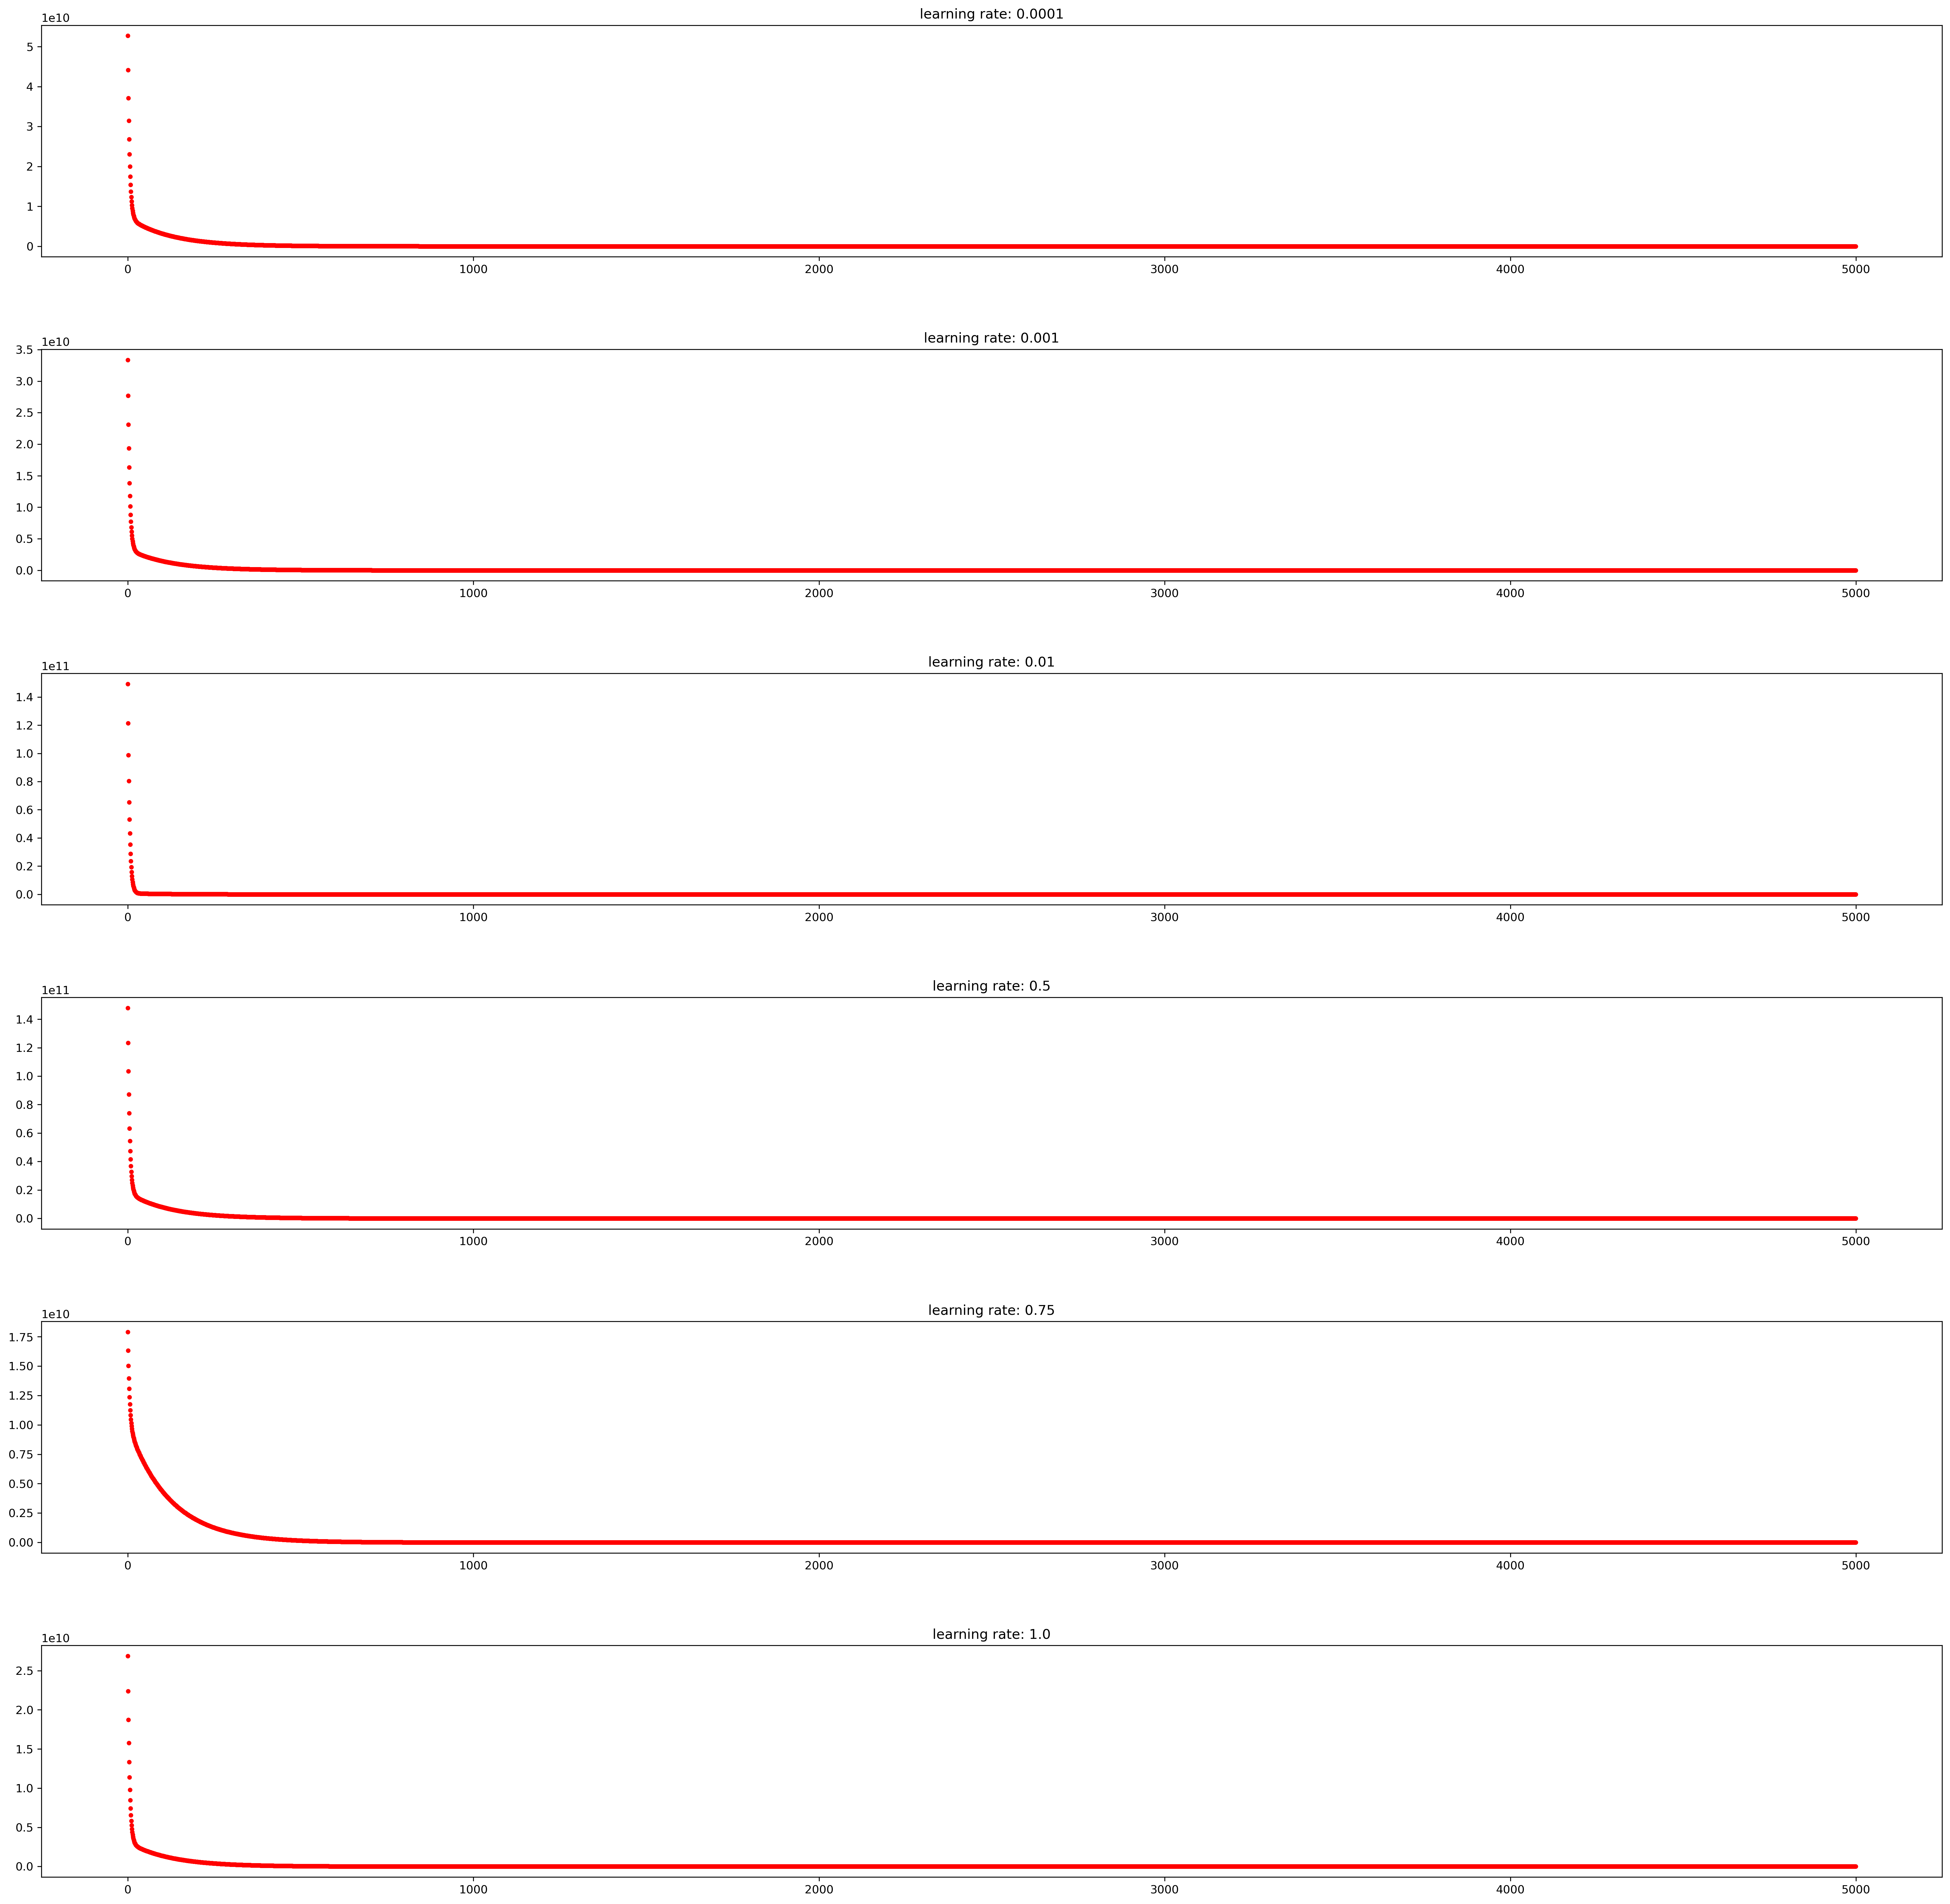

In [29]:
# n_iter = 1000
# X = aleatoire_X(800, 1)
# #scaler = StandardScaler()
# #X_norm2 = scaler.fit_transform(X)
# y = aleatoire_y(X)

# theta = np.random.randn(2,1)
# X_b = np.c_[np.ones((len(X), 1)), X]

# for e in epsilon:
#     theta, errors = ordinaire_DGO_modifie(X_b, y, theta, n_iter=n_iter, eta=0.01, epsilon=e)
#     print('-'*41)
#     print('|{:>20}:{:>10}'.format('l_rate', e))
#     print('|{:>20}:{:>10.3f}\n|{:>20}:{:>10.3f}'.format('theta_0', theta[0][0], 'theta_1', theta[1][0]))
#     #print('|{:>20}:{:>10.2f}'.format('erreurs MSE', errors[-1]))
#     print('-'*41)
#     fig,ax = plt.subplots(figsize=(12,8))
    
#     ax.set_ylabel('J(Theta)')
#     ax.set_xlabel('Iterations')
#     _=ax.plot(range(n_iter),errors,'b.')
    
n_iter = 5000
epsilon = [0.0001, 0.001, 0.01, 0.5, 0.75, 1.0]
fig = plt.figure(figsize=(30,30),dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
X = aleatoire_X(800, 1)
#scaler = StandardScaler()
#X_norm2 = scaler.fit_transform(X)
y = aleatoire_y(X)
i = 0

X_b = np.c_[np.ones((len(X), 1)), X]
for e in epsilon:
    theta = np.random.randn(2,1)*10
    i += 1
    print('-'*41)
    theta, errors = ordinaire_DGO_modifie(X_b, y, theta, n_iter=n_iter, eta=0.01, epsilon=e)
    print('|{:>20}:{:>10}'.format('seuil', e))
    print('|{:>20}:{:>10}'.format('taux', 0.01))
    print('|{:>20}:{:>10.3f}\n|{:>20}:{:>10.3f}'.format('theta_0', theta[0][0], 'theta_1', theta[1][0]))
    #print('|{:>20}:{:>10.2f}'.format('erreurs MSE', errors[-1]))
    ax = fig.add_subplot(len(epsilon), 1, i)
    ax.set_title('learning rate: {}'.format(e))
    ax.plot(range(n_iter), errors, 'r.')

<pre>
<ul>
(e) Rappeler les avantages et inconvénient, puis implémenter et tester les méthodes de descente de gradient suivantes
 <li>i. Descente de gradient stochastique,</li>
 <li>ii. Descente de gradient par mini-lots.</li>
</ul>
</pre>

<img src="img/GDS.png">

<div style="font-family: callipso">
<p>
L'algorithme de descente en gradient présente quelques inconvénients. Nous devons examiner de plus près la quantité de calculs que nous effectuons pour chaque itération de l'algorithme.
    <br/>
Supposons que nous ayons 10 000 points de données et 10 caractéristiques. La somme des résidus au carré est constituée d'autant de termes qu'il y a de points de données, soit 10 000 termes dans notre cas. Nous devons calculer la dérivée de cette fonction par rapport à chacune des caractéristiques, donc en fait nous ferons 10000 * 10 = 100 000 calculs par itération. Il est courant de prendre 1000 itérations, en effet nous avons 100 000 * 1000 = 100000000 calculs pour compléter l'algorithme. C'est à peu près une surcharge et donc la descente du gradient est lente sur des données énormes.
</p><br/>
    <h2><u>Solution 1:</u></h2>
    <p>La descente de gradient stochastique vient à notre secours ! <b>"Stochastique"</b>, en termes simples, signifie <b>"aléatoire"</b>.</p>
</div>
<div style="font-family: callipso">
    <h3 align="center">La descente de gradient stochastique</h3>
<p>La descente de gradient stochastique est un algorithme très populaire et courant utilisé dans divers algorithmes de Machine Learning, qui constitue surtout la base des réseaux de neurones.
</p> 
    <p>La DGS choisit au hasard un point de données dans l'ensemble des données à chaque itération pour réduire énormément les calculs.</p>   
<br/>
    <h2><u>Solution 2:</u></h2>
    <p>Descente de gradient par mini-lots.</p>
    <h3 align="center">Descente de gradient par mini-lots.</h3>
    <p>
    Il est également courant d'échantillonner un petit nombre de points de données au lieu d'un seul point à chaque étape et c'est ce qu'on appelle la descente de gradient par mini-lots "mini-batch". Le mini-batch tente de trouver un équilibre entre la qualité de la descente de la pente et la vitesse du DGS.
    </p>
</div>


# Implémentations


In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.random.rand(800, 1)
y = 4 + 3 * X + np.random.randn(800, 1)
@time_decorator
def sgd_reg(max_iter=500, tol=0.001):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    return model
def affiche_perf(model):
    print('-'*41)
    model_r = model.fit(X, y.ravel()) 
    print('{:>20} {:>10.3f}'.format("theta_0", model_r.intercept_[0]))
    print('{:>20} {:>10.3f}'.format("theta_1",model_r.coef_[0]))
    print('-'*41)

In [39]:
model = sgd_reg()
affiche_perf(model)

|   temps d'execution:   0.00004 secondes
-----------------------------------------
             theta_0      4.133
             theta_1      2.671
-----------------------------------------


In [57]:
def f_hypothese(X, theta): 
    return np.dot(X, theta) 

def gradient(X, y, theta): 
    h = f_hypothese(X, theta) 
    grad = np.dot(X.transpose(), (h - y)) 
    return grad 
  
def f_cout(X, y, theta): 
    h = f_hypothese(X, theta) 
    J = np.dot((h - y).transpose(), (h - y)) 
    J /= 2
    return J[0] 

def creer_mini_batches(X, y, batch_size): 
    mini_batches = [] 
    data = np.hstack((X, y)) 
    np.random.shuffle(data) 
    n_minibatches = data.shape[0] // batch_size 
    i = 0
  
    for i in range(n_minibatches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
@time_decorator
def MBgradientDescent(X, y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = creer_mini_batches(X, y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta) 
            error_list.append(f_cout(X_mini, y_mini, theta)) 
  
    return theta, error_list 

In [59]:
X_b = np.c_[np.ones((800, 1)), X]
print('-'*41)
theta, errors = MBgradientDescent(X_b, y)
print('|{:>20} {:>10.3f}'.format("theta_0", theta[0][0]))
print('|{:>20} {:>10.3f}'.format("theta_1", theta[1][0]))
print('-'*41)

-----------------------------------------
|   temps d'execution:   0.00556 secondes
|             theta_0      4.068
|             theta_1      2.318
-----------------------------------------


# FIN